In [25]:
import numpy as np 
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [26]:
df = pd.read_csv('train.csv')

In [40]:
df.shape

(891, 4)

Pclass    0
SibSp     0
Parch     0
Fare      0
dtype: int64

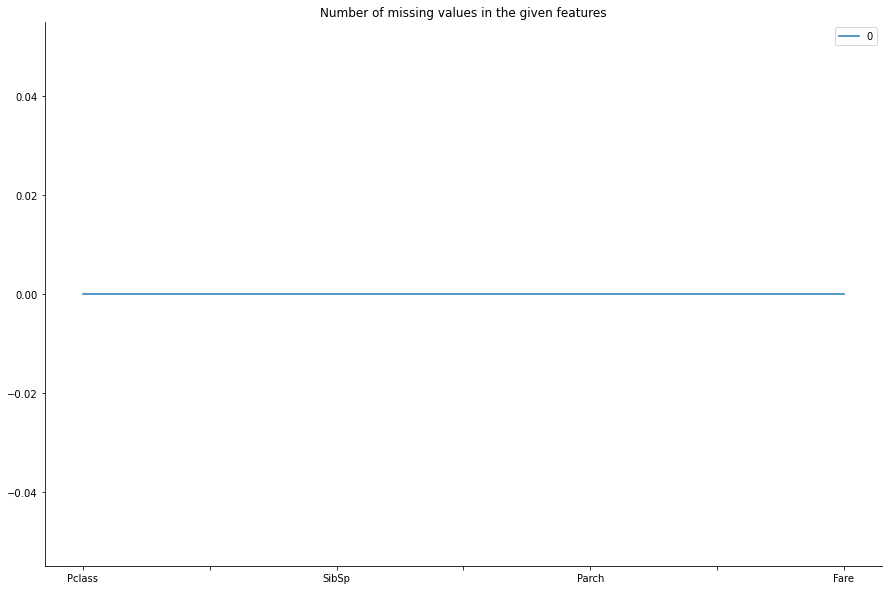

In [41]:
pd.DataFrame(df.isnull().sum()).plot.line().set_title("Number of missing values in the given features")
df.isnull().sum()

In [27]:
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
y = df['Survived']
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [30]:
df.drop(['PassengerId', 'Survived', 'Name', 'Sex','Age', 'Ticket', 'Cabin', 'Embarked'], axis=1,inplace=True)

In [31]:
X = df
X

,Pclass,SibSp,Parch,Fare
0,3,1,0,7.2500
1,1,1,0,71.2833
2,3,0,0,7.9250
3,1,1,0,53.1000
4,3,0,0,8.0500
...,...,...,...,...
886,2,0,0,13.0000
887,1,0,0,30.0000
888,3,1,2,23.4500
889,1,0,0,30.0000


In [32]:
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
predictions = model.predict_proba(X_test)

In [35]:
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1])

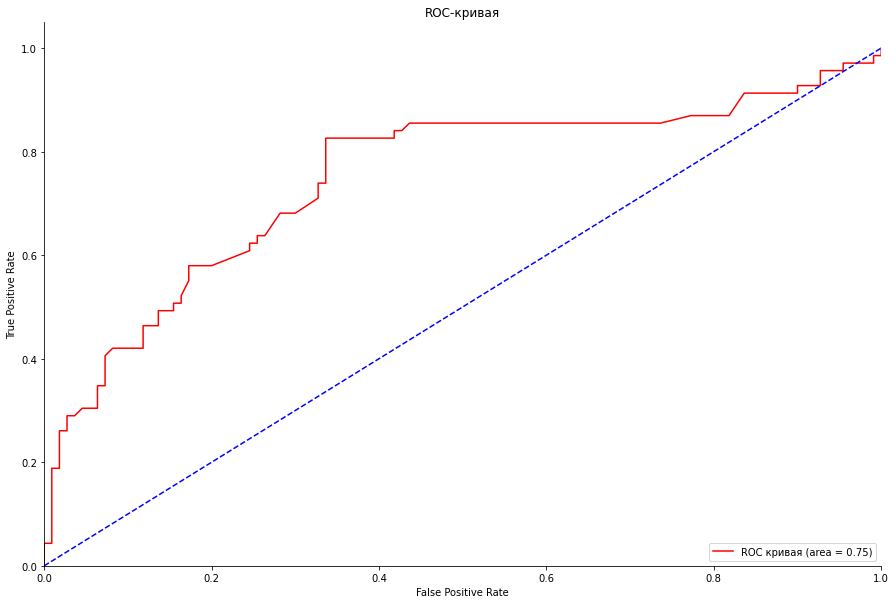

In [36]:
roc_auc = auc(fpr, tpr)
plt.rcParams["figure.figsize"] = (15,10)
plt.plot(fpr, tpr, color='red',
         label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

In [37]:
mising_value_count = df.isnull().sum()
mising_value_count

Pclass    0
SibSp     0
Parch     0
Fare      0
dtype: int64

In [47]:
df2 = pd.read_csv('train.csv')
df2 = df2[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Survived']]
df.sample(10)

,Pclass,SibSp,Parch,Fare
783,3,1,2,23.4500
646,3,0,0,7.8958
182,3,4,2,31.3875
596,2,0,0,33.0000
62,1,1,0,83.4750
655,2,2,0,73.5000
239,2,0,0,12.2750
5,3,0,0,8.4583
496,1,1,0,78.2667
393,1,1,0,113.2750


In [48]:
df2 = df2[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'Survived']]
df2.sample(10)

,Pclass,Sex,Age,Fare,Cabin,Survived
883,2,male,28.0,10.5000,NaN,0
156,3,female,16.0,7.7333,NaN,1
292,2,male,36.0,12.8750,D,0
445,1,male,4.0,81.8583,A34,1
87,3,male,NaN,8.0500,NaN,0
599,1,male,49.0,56.9292,A20,1
148,2,male,36.5,26.0000,F2,0
524,3,male,NaN,7.2292,NaN,0
204,3,male,18.0,8.0500,NaN,1
113,3,female,20.0,9.8250,NaN,0


In [50]:
skip = df2.isnull().sum()
skip

Pclass        0
Sex           0
Age         177
Fare          0
Cabin       687
Survived      0
dtype: int64

In [51]:
df2.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [52]:
df2['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

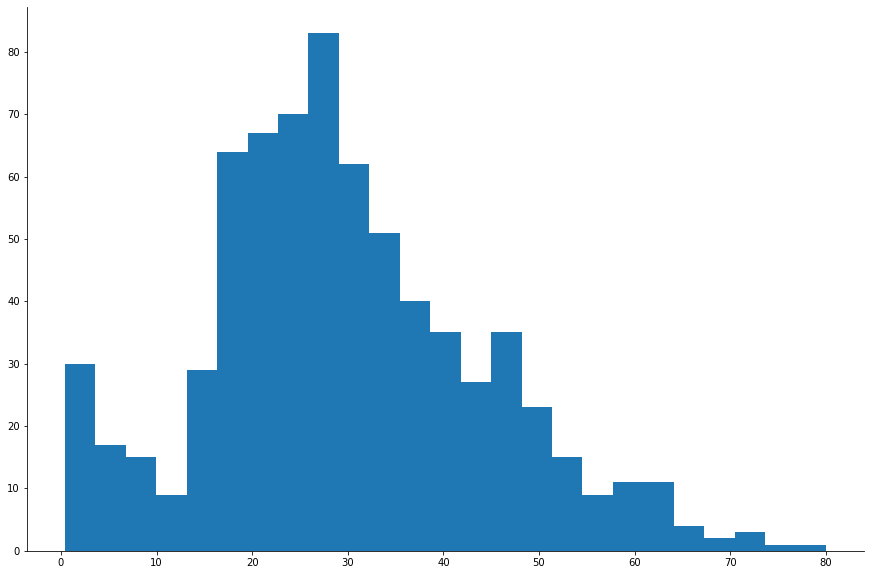

In [53]:
plt.hist(df2['Age'], bins=25)
plt.show()

In [54]:
df2.loc[:, 'Age'].fillna(df2['Age'].median(), inplace=True)
df2['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [55]:
df2['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [56]:
df2['Cabin'].mode()[0]

'B96 B98'

In [57]:
df2.loc[:, 'Cabin'].fillna(df2['Cabin'].mode()[0], inplace=True)
df2['Cabin'].unique()

array(['B96 B98', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [58]:
skip = df2.isnull().sum()
skip

Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
Survived    0
dtype: int64

In [59]:
le = LabelEncoder()

In [60]:
le.fit(df2['Cabin'])
df2['Cabin_Le'] = le.transform(df2['Cabin'])
df2.drop(['Cabin'], axis=1, inplace=True)
df2.sample(3)

,Pclass,Sex,Age,Fare,Survived,Cabin_Le
293,3,female,24.0,8.850,0,47
528,3,male,39.0,7.925,0,47
93,3,male,26.0,20.575,0,47


In [61]:
le.fit(df2['Sex'])
df2['Sex_Le'] = le.transform(df2['Sex'])
df2.drop(['Sex'], axis=1, inplace=True)
df2.sample(3)

,Pclass,Age,Fare,Survived,Cabin_Le,Sex_Le
13,3,39.0,31.2750,0,47,1
773,3,28.0,7.2250,0,47,1
310,1,24.0,83.1583,1,72,0


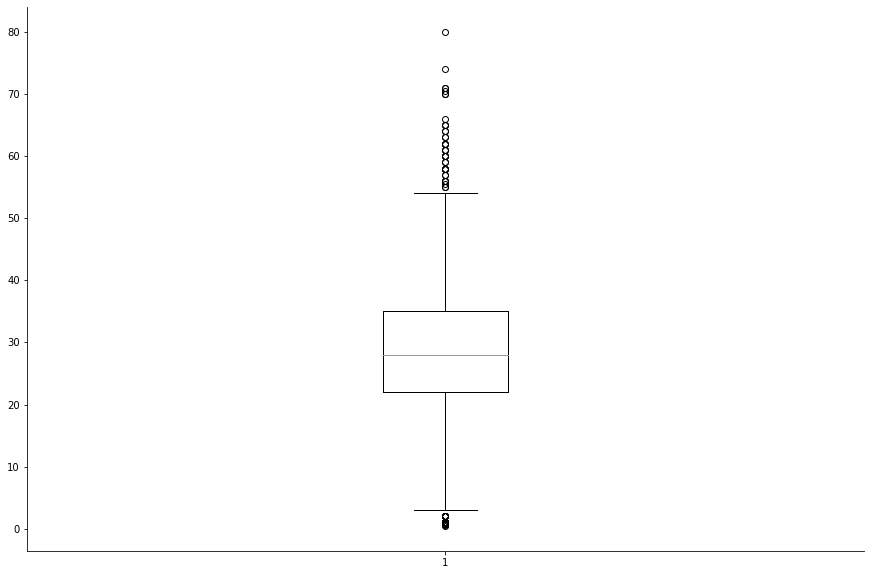

In [62]:
plt.boxplot(df2['Age'])
plt.show()

In [63]:
q1 = df2['Age'].quantile(0.25)
q3 = df2['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr) 
print(lower_bound)
upper_bound = q3 + (1.5 * iqr)
print(upper_bound)
# remove_outliers = df_train2[df_train2['Age'].between(lower_bound, upper_bound, inclusive=True)].sort_values('Age')
# remove_outliers.sample(5)

2.5
54.5
